# 2/12/21 - First model G3575500 (LinKS 1906)

In [13]:
### libraries
%matplotlib inline
import matplotlib.pyplot as plt
from autoconf import conf
import autolens as al
import autolens.plot as aplt
import autofit as af
import pandas as pd
import numpy as np
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.stats import sigma_clip as clip
from os import path
from pyprojroot import here

workspace_path = '/data/sknabel/autolens_workspace'
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")
# paths
autoz_path = '/data/sknabel/autoz_lens_model/'
file_path = f'{autoz_path}files/'
csv_path = f'{file_path}csv/'
fits_path = f'{file_path}fits/'
png_path = f'{autoz_path}visuals/png/'
pdf_path = f'{autoz_path}visuals/pdf/'
object_folder = f'{fits_path}G3575500_1906/'

/data/sknabel/autolens_workspace
Working Directory has been set to `/data/sknabel/autolens_workspace`


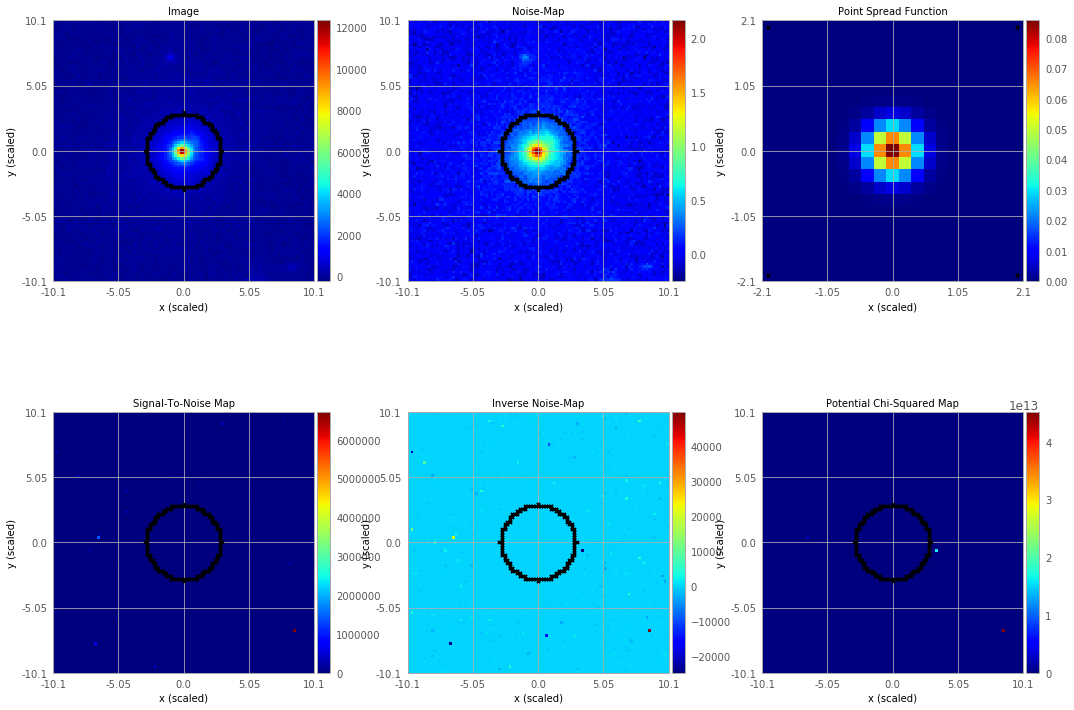

In [21]:
imaging = al.Imaging.from_fits(image_path=path.join(object_folder, '1906_r_image.fits'),
                              noise_map_path='/data/sknabel/autoz_lens_model/files/fits/G3575500_1906/1906_r_noisemap.fits',
                              psf_path=path.join(object_folder, '1906_r_psf_resized.fits'),
                               pixel_scales=0.2)
mask = al.Mask2D.circular(
    shape_2d=imaging.shape_2d, pixel_scales=imaging.pixel_scales, sub_size=1, radius=3.0
)
visuals_2d = aplt.Visuals2D(mask=mask)

imaging_plotter = aplt.ImagingPlotter( # this is where the noise is coming up weird
    imaging=imaging, visuals_2d=aplt.Visuals2D(mask=mask)
)
imaging_plotter.subplot_imaging()

# Why does my noise map above not look like the noise map? What is al.Imaging.from_fits doing to it?

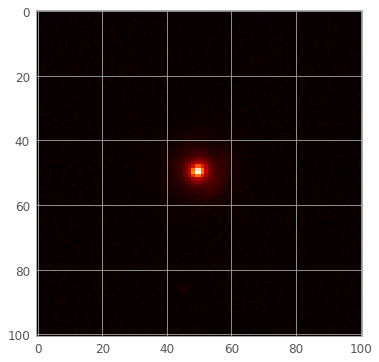

In [18]:
noise_map = fits.open('/data/sknabel/autoz_lens_model/files/fits/G3575500_1906/1906_r_noisemap.fits')[0].data

plt.imshow(noise_map)

In [19]:
array = imaging.noise_map.in_2d

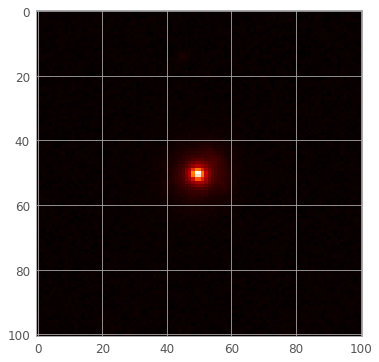

In [20]:
plt.imshow(array)

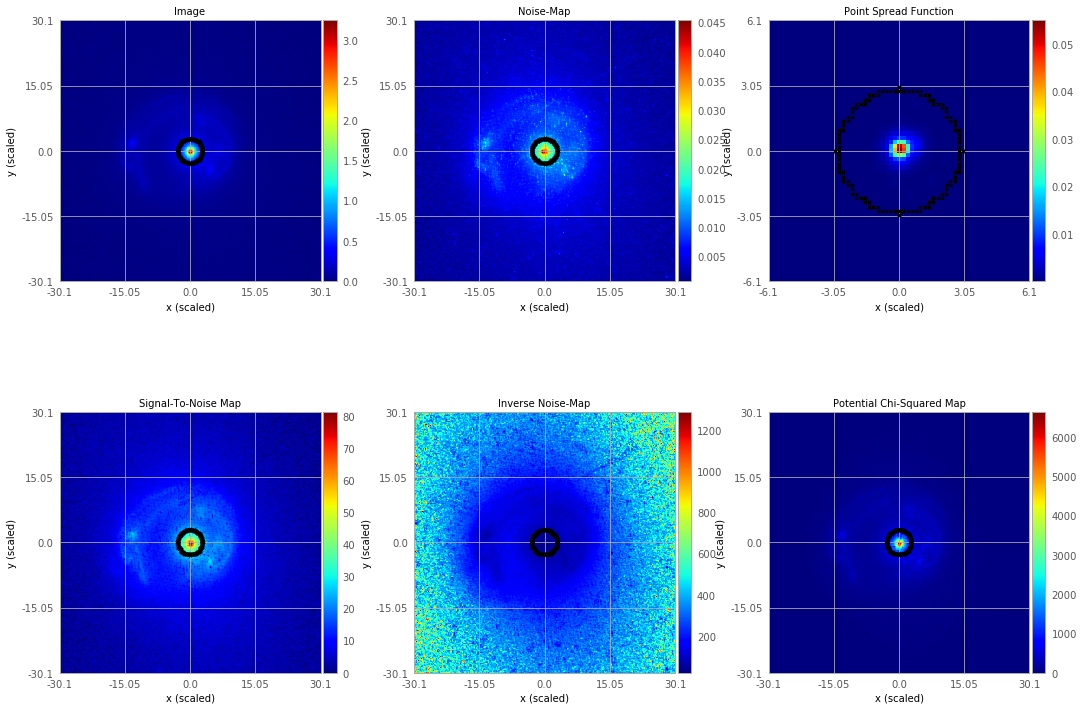

In [23]:
# trying with slacs 
slacs_folder='/data/sknabel/autolens_workspace/dataset/slacs/slacs1430+4105'
imaging = al.Imaging.from_fits(image_path=path.join(slacs_folder, 'image.fits'),
                              noise_map_path=path.join(slacs_folder, 'noise_map.fits'),
                              psf_path=path.join(slacs_folder, 'psf.fits'),
                               pixel_scales=0.2)
mask = al.Mask2D.circular(
    shape_2d=imaging.shape_2d, pixel_scales=imaging.pixel_scales, sub_size=1, radius=3.0
)
visuals_2d = aplt.Visuals2D(mask=mask)

imaging_plotter = aplt.ImagingPlotter( # this is where the noise is coming up weird
    imaging=imaging, visuals_2d=aplt.Visuals2D(mask=mask)
)
imaging_plotter.subplot_imaging()